In [72]:
import matilda
from sklearn.cluster import DBSCAN
import numpy

In [71]:
cloud = matilda.examples.circle_cloud(res=200)
cloud = matilda.add_uniform_noise(cloud, -.1,.1)
heights = cloud[:,1:]
clustering = DBSCAN(eps=.25,min_samples=1)

mapper = matilda.Mapper(cloud, heights, clustering)

mapper.rectangle_mapper(10,.35,min_samples_preimage=1)

mapper.plot_interactive(heights[:,0], radius=.1,background_fill_color="white")

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6),dpi=300)

plt.scatter(*cloud.T)
plt.show()
plt.close()

plt.figure(figsize=(6,6),dpi=300)
overlaps = set([])
for k,v in mapper.cluster_indices.items():
    unique = set(v)
    for kk,vv in mapper.cluster_indices.items():
        if kk != k:
            inter = set(v).intersection(set(vv))
            unique.difference_update(inter)
            overlaps = overlaps.union(inter)
    unique = list(unique)
    plt.scatter(*cloud[unique].T,marker="o", alpha=.5)
overlaps = list(overlaps)
plt.scatter(*cloud[overlaps].T, color="red",marker="o", alpha=.75,s=7)
plt.show()
plt.close()

Computing cover...
Computing preimages...
Clustering...


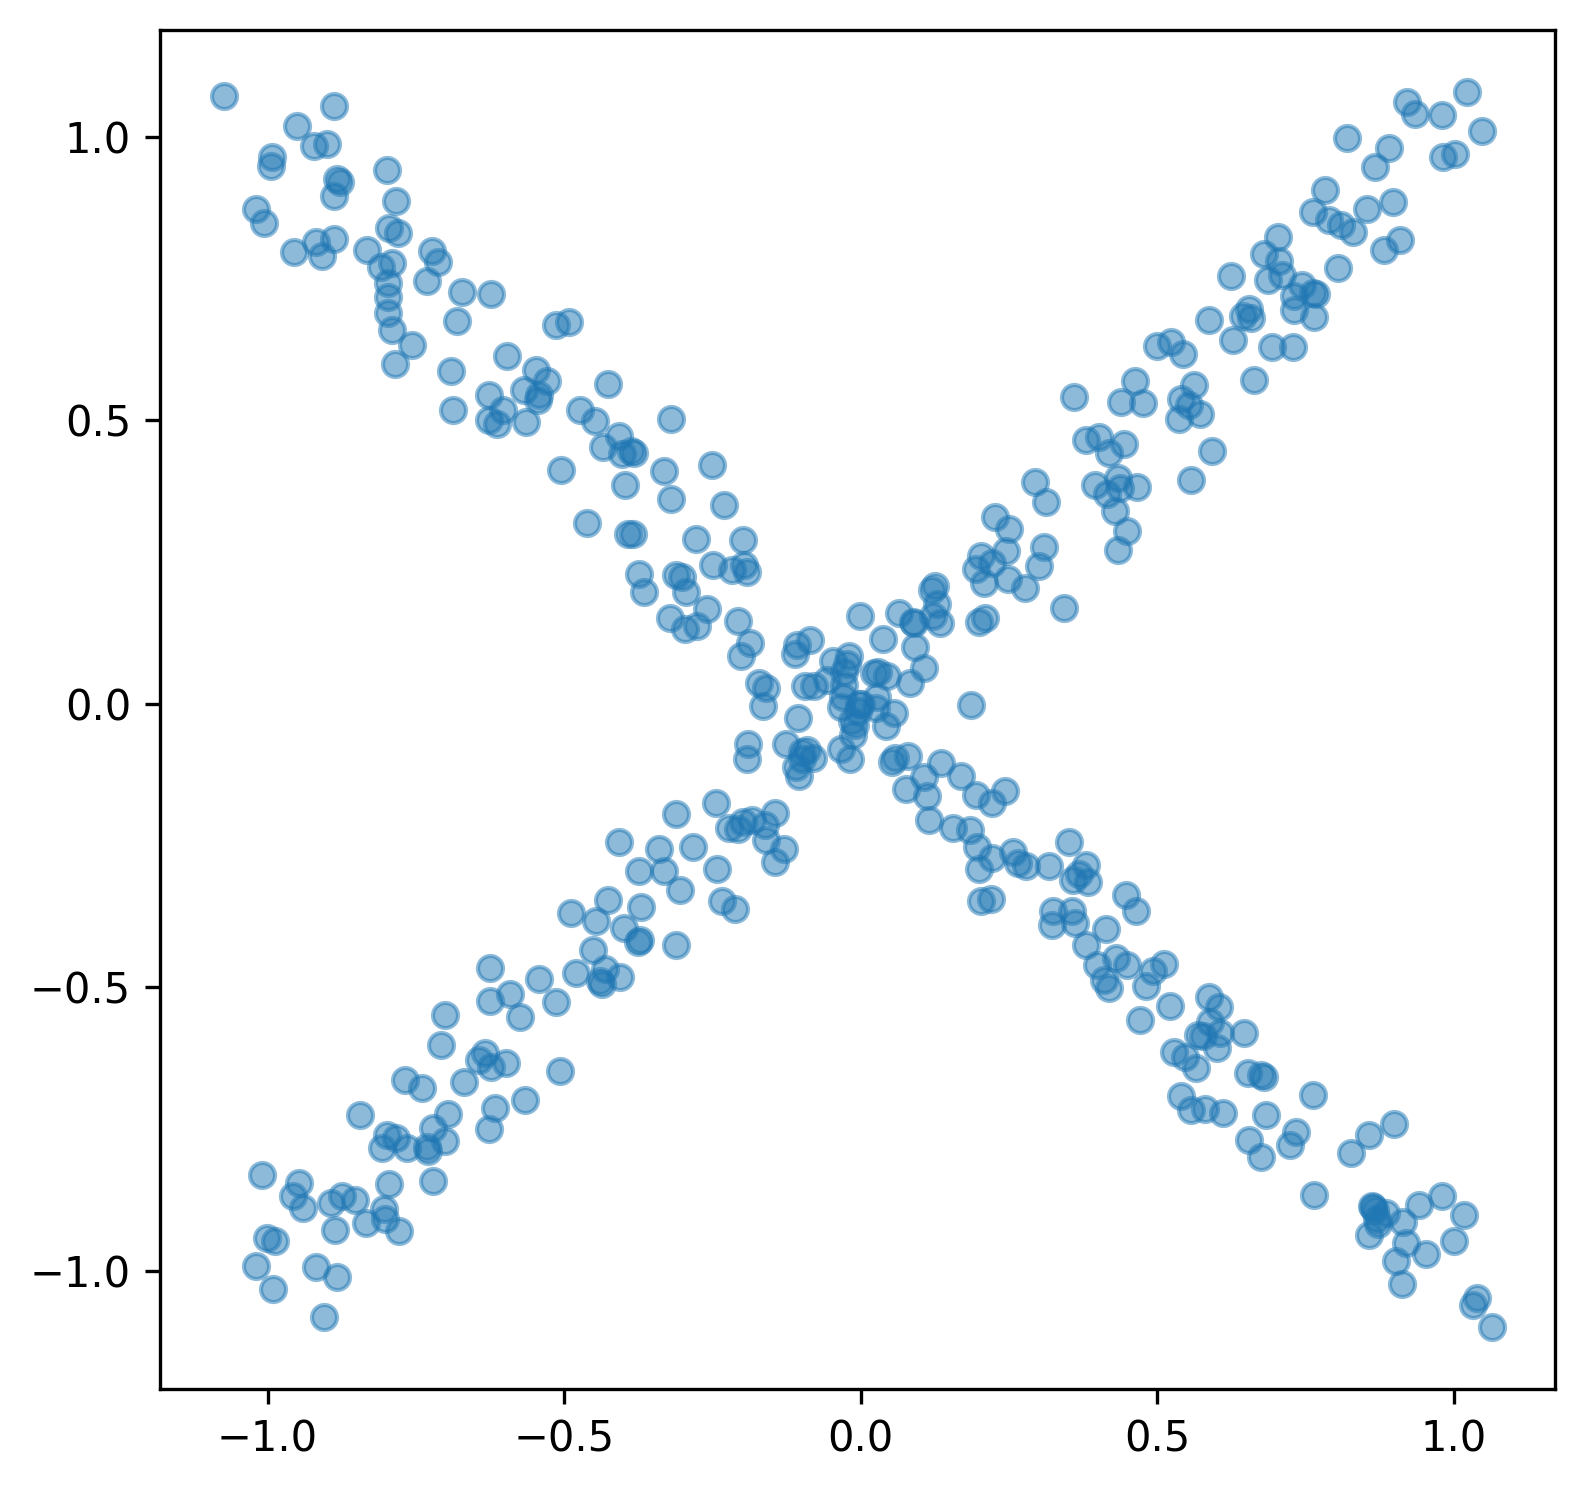

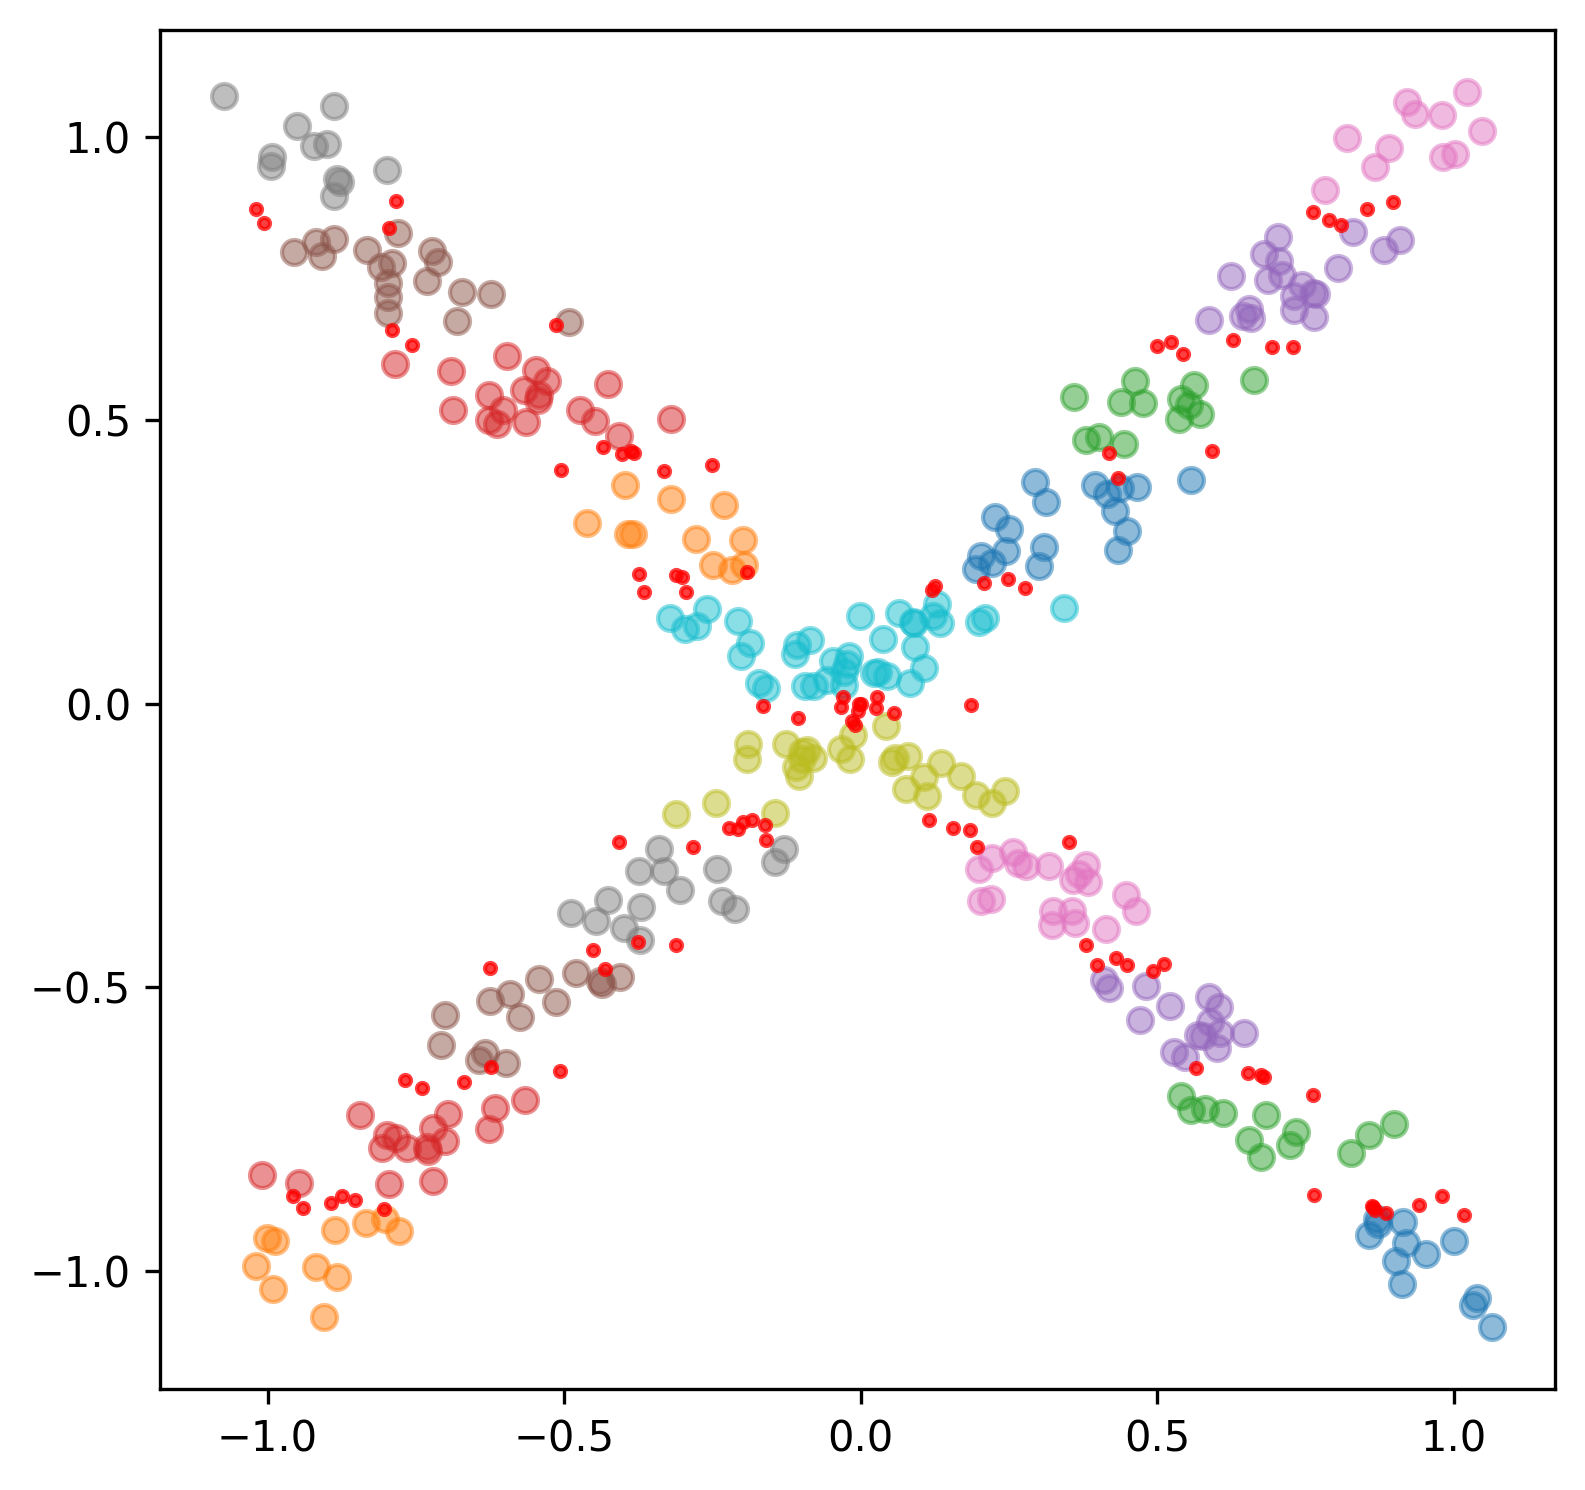

In [96]:
cloud = numpy.r_[numpy.linspace([0,0],[1,-1],100), 
                 numpy.linspace([0,0],[-1,-1],100),
                 numpy.linspace([0,0],[1,1],100),
                 numpy.linspace([0,0],[-1,1],100)]
rotation = numpy.array([[numpy.cos(numpy.pi/6),-numpy.sin(numpy.pi/6)],[numpy.sin(numpy.pi/6),numpy.cos(numpy.pi/6)]])
# cloud = numpy.matmul(cloud,rotation)
cloud = matilda.add_uniform_noise(cloud, -.1,.1)
heights = cloud[:,1:]
clustering = DBSCAN(eps=.17,min_samples=1)

mapper = matilda.Mapper(cloud, heights, clustering)

mapper.rectangle_mapper(10,.2,min_samples_preimage=1)

mapper.plot_interactive(heights[:,0], radius=.1,background_fill_color="white")

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6),dpi=300)

plt.scatter(*cloud.T,alpha=.5)
plt.show()
plt.close()

plt.figure(figsize=(6,6),dpi=300)
overlaps = set([])
for k,v in mapper.cluster_indices.items():
    unique = set(v)
    for kk,vv in mapper.cluster_indices.items():
        if kk != k:
            inter = set(v).intersection(set(vv))
            unique.difference_update(inter)
            overlaps = overlaps.union(inter)
    unique = list(unique)
    plt.scatter(*cloud[unique].T,marker="o", alpha=.5)
overlaps = list(overlaps)
plt.scatter(*cloud[overlaps].T, color="red",marker="o", alpha=.75,s=7)
plt.show()
plt.close()